## Feature scaling

A technique for rescaling the dataset to ensure that numerical features have a similar range.

> Feature scaling is a fundamental preprocessing step in machine learning that plays a pivotal role in ensuring fair comparisons and accurate predictions by standardizing the scale of numerical features. Many machine learning algorithms perform better or converge faster when the input numerical features are on a similar scale.

* Always rescale (with whatever method) if some features have too small or too large values.
* It's never a harm to rescale features &rarr; do it when in doubt...
* Good candidates for rescalling are features with very different ranges:
<table>
    <tbody>
        <tr>
            <th>feature $x_{1}$</th> 
            <th>feature $x_{2}$</th>
            <th> </th>
        </tr>        
        <tr>
            <td>0 $ \leq x_{1} \leq$ 3</td> 
            <td>-2 $ \leq x_{2} \leq$ 0.5</td>
            <td>similar ranges, no need to rescale</td>
        </tr>
        <tr>
            <td>-100 $ \leq x_{1} \leq$ 100</td> 
            <td>-0.001 $ \leq x_{2} \leq$ 0.001</td>
            <td>very different ranges, must rescale</td>
        </tr>
    </tbody>
</table> 
<br>
* It's more likely that a model will learn to chose relatively small parameter $w$ when the range of a feature is relatively large, and vice versa.
* Example</u>: $price^{(i)}$ = $w_{1}x_{1}^{(i)}$ + $w_{2}x_{2}^{(i)}$ + $b$ 
* If $x_{1}$ is in range 300 - 2000 [area  in sq.m.] => the model would probably learn a small $w_{1}$ such as 0.1
* If $x_{2}$ is in range 0 - 5 [# of rooms] => the model would probably learn a large $w_{2}$ such as 100
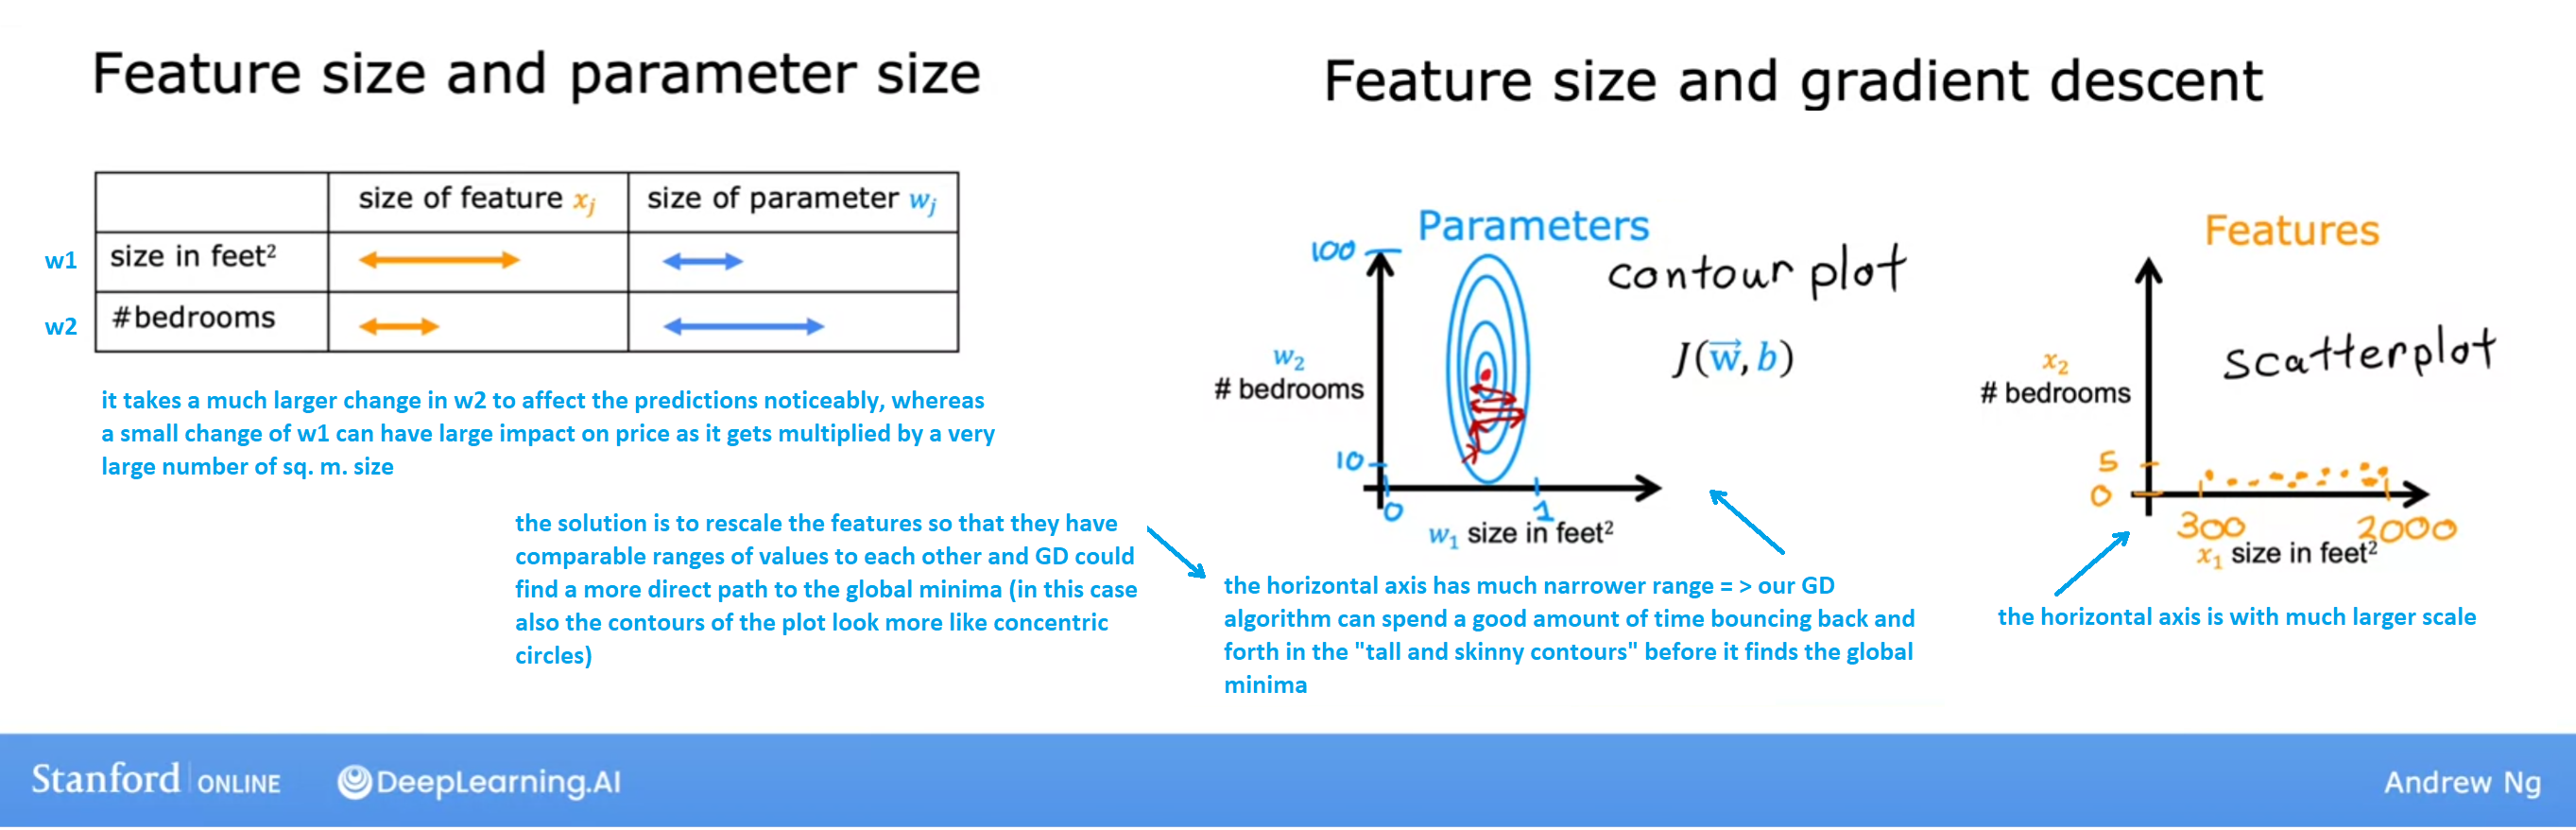


## Methods of feature scalling

* Divide all values by the max value in the range
<table>
    <tbody>
        <tr>
            <th>feature $x_{1}$</th> 
            <th>feature $x_{2}$</th>
            <th> </th>
        </tr>        
        <tr>
            <td>300 $ \leq x_{1} \leq$ 2000</td> 
            <td>0 $ \leq x_{2} \leq$ 5</td> 
        </tr>
        <tr>
            <td>$x_{1}$_scaled = $x_{1} / 2000$</td> 
            <td>$x_{2}$_scaled = $x_{2} / 5$</td> 
        </tr>
        <tr>
            <td>0.15 $ \leq x_{1}$_scaled $\leq$ 1</td> 
            <td>0 $ \leq x_{2}$_scaled $\leq$ 1</td> 
        </tr>        
    </tbody>
</table>  
<br> 

* Mean normalization:
* Find the average value of each feature $x_{j}^{i}$ (i.e column)
* Find a new range for each feature by computing the "mean" values: $x_{j}^{i}$_scaled = $\frac{ x_{j}^{i} - mean_{j} }{ max_{j} - min_{j} }$ 
* Note: "average" is the arithmetic mean of a group of values: $\frac{ sum\;of\;all\;values }{ num\;of\;all\;values }$           
<table>
    <tbody>
        <tr>
            <th>feature $x_{1}$</th> 
            <th>feature $x_{2}$</th>
            <th> </th>
        </tr>        
        <tr>
            <td>300 $ \leq x_{1} \leq$ 2000</td> 
            <td>0 $ \leq x_{2} \leq$ 5</td> 
        </tr>
        <tr>
            <td>$mean_{1}$ = 600</td> 
            <td>$mean_{2}$ = 2.3</td> 
        </tr>
        <tr>
            <td>$x_{1}$_scaled = $\frac{ x_{1} - 600 }{ 2000 - 300 }$</td> 
            <td>$x_{2}$_scaled = $\frac{ x_{2} - 2.3 }{ 5 - 0 }$</td> 
        </tr>    
        <tr>
            <td>-0.18 $ \leq x_{1}$_scaled $\leq$ 0.82</td> 
            <td>-0.46 $ \leq x_{2}$_scaled $\leq$ 0.54</td> 
        </tr>          
    </tbody>
</table>  
<br>

* Z-score normalization:
* Find the standard deviation $\sigma$ of each range (i.e. of each feature = each column in the dataset)
* $\sigma$ = $\sqrt{ \frac { (\sum{x_{i} - \mu})^2 } { N } }$ , where:
* * $N$ = size of population
* * $x_{i}$ = each value of population
* * $\mu$ = the population's mean 
* Normalize by the formula: $x_{j}^{i}$ _scaled = $\frac {x_{j}^{i} - \mu_{j}} { \sigma_{j} }$
* After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.
<br>
<br>
<br>
<u>Note</u>
* median = middle (central) element of a sorted collection
* mean = arithmetic mean (average)
* mode = the most frequent element 
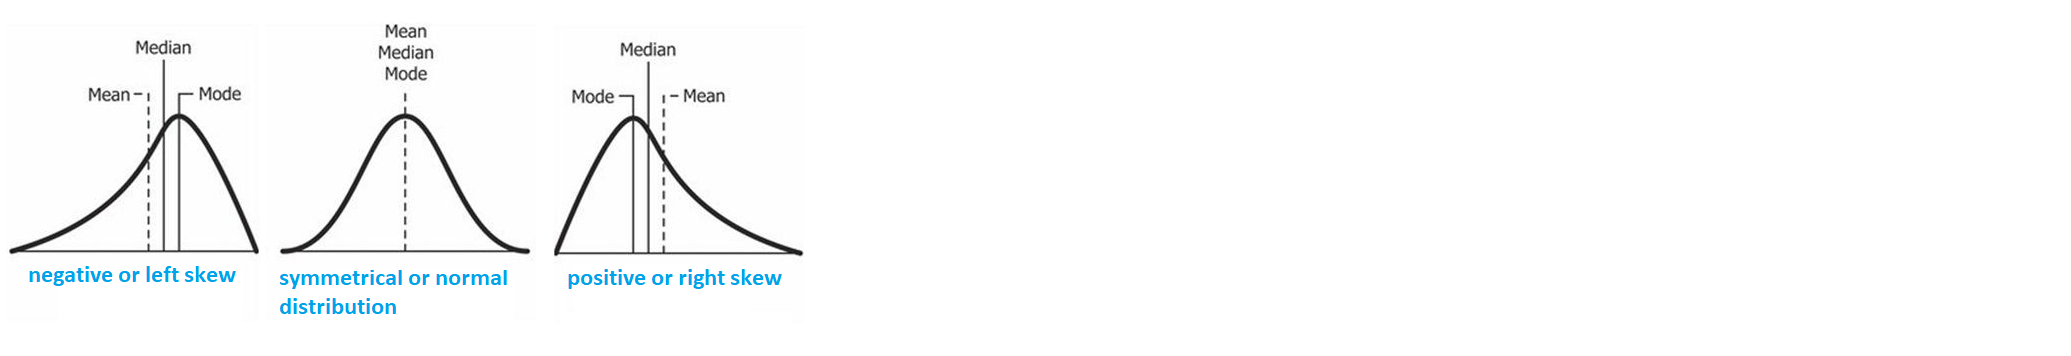

## Feature scaling - Example

Given a dataset with 4 features - size, bedrooms, floor and age, build a linear regression model for predicting house prices.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/1.5_homeprices.csv')
data.head(20)

,area,bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
5,1314.0,2.0,1.0,14.0,415.0
6,864.0,2.0,1.0,66.0,230.0
7,1836.0,3.0,1.0,17.0,560.0
8,1026.0,3.0,1.0,43.0,294.0
9,3194.0,4.0,2.0,87.0,718.2


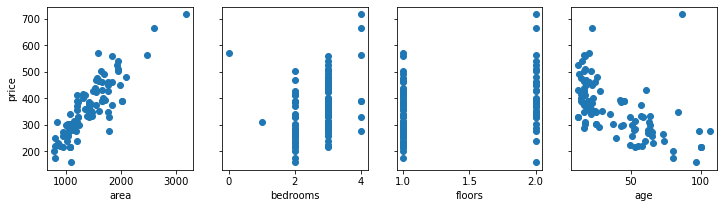

In [5]:
X_train = np.array(data.iloc[:, 0:4])
X_features = ['area', 'bedrooms', 'floors', 'age']
y_train = np.array(data.iloc[:, 4]) # 'price'

fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("price")
plt.show()

# Increasing size also increases price. 
# Number of bedrooms and floors don't seem to have strong impact on price. 
# Newer houses have higher prices than older ones.

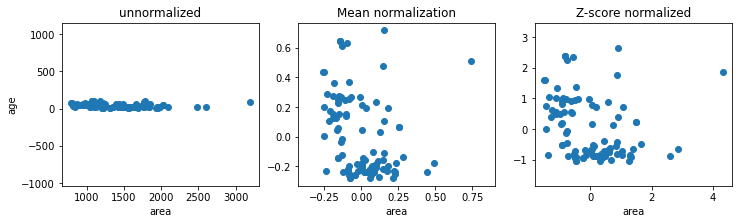

In [6]:
# find the mean of each feature (i.e. per column) with shape (n,)
mu = np.mean(X_train, axis=0) 
# find the standard deviation of each feature (i.e. per column) with shape (n,)
sigma = np.std(X_train, axis=0) 
# max value per column/feature with shape (n,)
maxv = np.max(X_train, axis=0)
# min value per column/feature with shape (n,)
minv = np.min(X_train, axis=0)
# element-wise, apply mean normalization per feature/column
X_mean = (X_train - mu)/(maxv - minv)
# element-wise, apply z-score normalization per feature/column
X_znorm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); 
ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')
ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]);  
ax[1].set_title("Mean normalization")
ax[1].axis('equal')
ax[2].scatter(X_znorm[:,0], X_znorm[:,3])
ax[2].set_xlabel(X_features[0]); 
ax[2].set_title("Z-score normalized")
ax[2].axis('equal') 
plt.show()